### Import Library

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Membaca kolom dari dataset Healthcare.csv
df = pd.read_csv('https://raw.githubusercontent.com/ahmadrendrafajaresta/Dataset_Projek/main/Dataset_11%20-%20Healthcare.csv')

In [ ]:
# Melihat tipe data dari kolom pada dataset dan data null
# Tipe data dari Semua kolom bertipe integer dan float 
# Tidak ada kolom dengan data null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Melakukan inisiasi nilai dalam bentuk penjelasan

df_edit = df.copy(deep=True)
df_edit.target = df_edit['target'].map({0:'Tidak Terkena', 1:'Terkena'})
df_edit.sex = df_edit['sex'].map({0:'Wanita', 1:'Pria'})
df_edit.cp = df_edit['cp'].map({0:'Typical angina', 1:'Atypical angina', 2 :'Non-anginal pain', 3:'Asymptomatic'})
df_edit.fbs = df_edit['fbs'].map({0:'fbs<=120', 1:'Fbs>120'})
df_edit.restecg = df_edit['restecg'].map({0:'Normal', 1:'Abnormal', 2:'Hypertrofi ventrikel'})
df_edit.exang = df_edit['exang'].map({0:'Tidak', 1:'Iya'})
df_edit.slope = df_edit['slope'].map({0:'UpSloping', 1:'FlatSloping', 2:'DownSloping'})
df_edit.ca = df_edit['ca'].map({0:'Tidak', 1:'Iya'})
df_edit.thal = df_edit['thal'].map(lambda x: 'normal' if x==0 or x==1 else ('rever' if x==2 else ('fixed')))

In [ ]:
# tampilan tabel inisiasi
df_edit

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Pria,Asymptomatic,145,233,Fbs>120,Normal,150,Tidak,2.3,UpSloping,Tidak,normal,Terkena
1,37,Pria,Non-anginal pain,130,250,fbs<=120,Abnormal,187,Tidak,3.5,UpSloping,Tidak,rever,Terkena
2,41,Wanita,Atypical angina,130,204,fbs<=120,Normal,172,Tidak,1.4,DownSloping,Tidak,rever,Terkena
3,56,Pria,Atypical angina,120,236,fbs<=120,Abnormal,178,Tidak,0.8,DownSloping,Tidak,rever,Terkena
4,57,Wanita,Typical angina,120,354,fbs<=120,Abnormal,163,Iya,0.6,DownSloping,Tidak,rever,Terkena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Wanita,Typical angina,140,241,fbs<=120,Abnormal,123,Iya,0.2,FlatSloping,Tidak,fixed,Tidak Terkena
299,45,Pria,Asymptomatic,110,264,fbs<=120,Abnormal,132,Tidak,1.2,FlatSloping,Tidak,fixed,Tidak Terkena
300,68,Pria,Typical angina,144,193,Fbs>120,Abnormal,141,Tidak,3.4,FlatSloping,NaN,fixed,Tidak Terkena
301,57,Pria,Typical angina,130,131,fbs<=120,Abnormal,115,Iya,1.2,FlatSloping,Iya,fixed,Tidak Terkena


### Heatmap

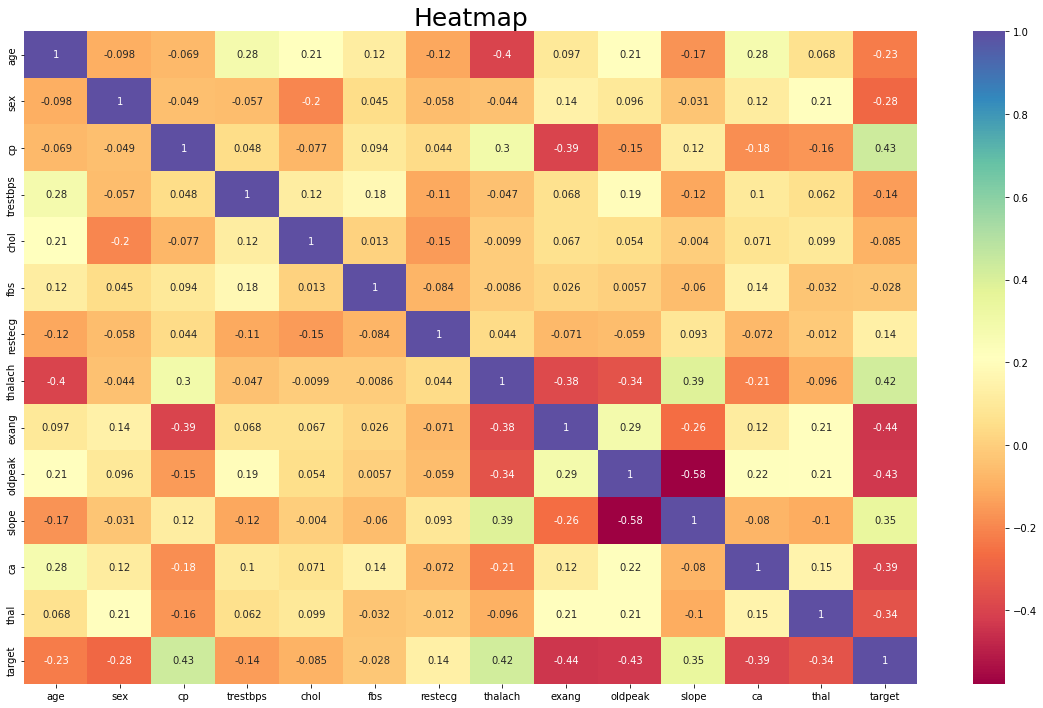

In [ ]:
# Grafik Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.title("Heatmap", fontsize = 25)
plt.show()

### Pie Chart

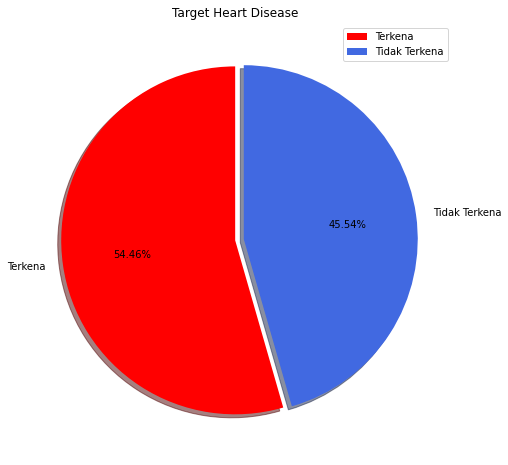

,target,Jumlah
0,1,165
1,0,138


In [ ]:
# Grafik Pie Chart

warna=['red','royalblue']
data = df_edit['target'].value_counts()
explode = (0, 0.05)

fig1, ax1 = plt.subplots(figsize=(8,8))
plt.pie(data, explode=explode,  autopct='%.2f%%', shadow=True, startangle=90, 
        colors=warna, 
        labels=data.index)

plt.title('Target Heart Disease')
plt.legend()
plt.show()

df[['target']].value_counts().to_frame().reset_index().rename({0:'Jumlah'}, axis=1)

## Data Preprocessing

### Check Missing value

* Pada Dataset tidak ada data yang missing.


In [ ]:
# mengecek data duplicate
df.duplicated().value_counts()

False    302
True       1
dtype: int64

* Ternyata ada 1 data yang terduplikasi.
* Maka proses berikutnya akan dihapus

In [ ]:
# menghapus data duplicate
data = df.drop_duplicates()

In [ ]:
# Melihat data

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Karena value pada kolom dataset semua berbentuk numerik.
* Maka langsung pada tahap berikutnya yaitu pengklasifikasian.

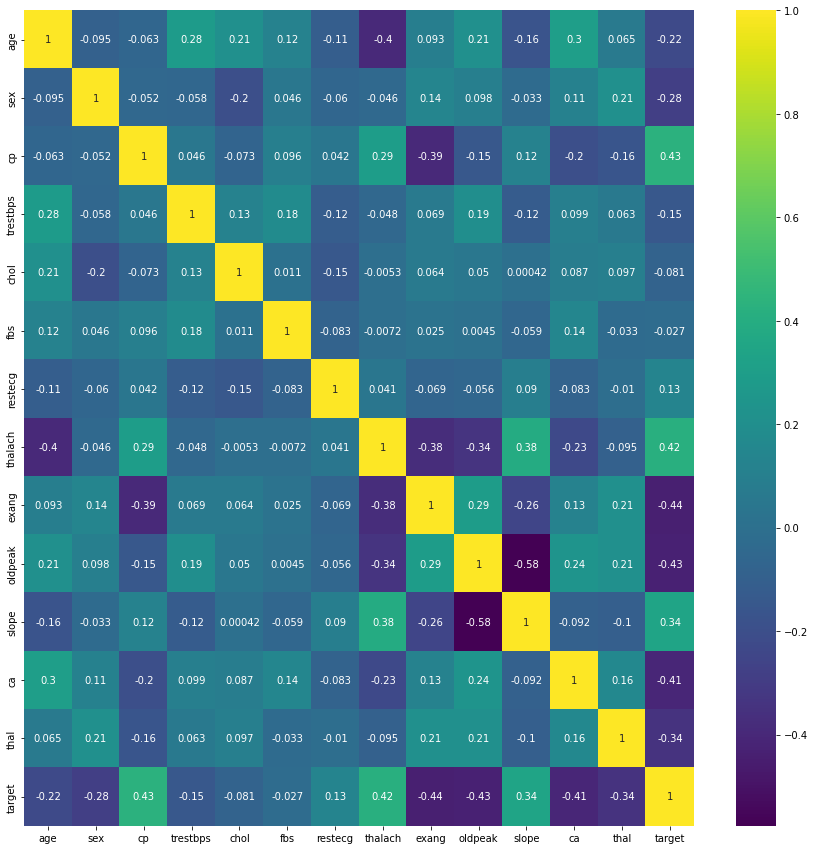

In [ ]:
# menampilkan heatmap kembali 

import seaborn as sns
fig = plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

### Features Importance

In [ ]:
# melakukan feature importance

cor = data.corr()
cor_target = abs(cor['target'])
cor_target.loc[cor_target>0.3]

cp         0.432080
thalach    0.419955
exang      0.435601
oldpeak    0.429146
slope      0.343940
ca         0.408992
thal       0.343101
target     1.000000
Name: target, dtype: float64

In [ ]:
# melakukan inisiasi x dan y yang akan digunakan untuk model ML

x = data[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

## Barplot

### Categorical vs Target

**Here we can do these observations:**
* Males are much more likely for heart diseases.
* Chest pain type is very subjective and has no direct relation on the outcome, asymptomatic chest pains having highest disease outcome.
* Blood sugar has no direct effect on the disease.
* Rest ECG results showing no direct results but having normal ECG is pretty good sign. Even though it's pretty rare in the data, if you ST-T wave abnormality you are 3 times more likely to have heart disease.
* Having exercise induced angina is pretty strong indicator for heart disease, patients are almost 3 times more likely to have disease if they have exercise induced angina. Meanwhile it's less than half for not having it.
* Patients who had flat slope distribution are more likely to have disease.
* Number of major vessels observed seems on similar levels for patients who have disease but 0 observations is good sign for not having disease.
* Having defected thalium test results is pretty strong indicator for heart disease.



In [ ]:
# Kolom kategorikal yang terpilih sesuai feature importance

categorical = ['cp', 'exang', 'slope', 'ca', 'thal']
categorical

['cp', 'exang', 'slope', 'ca', 'thal']

In [ ]:
# function untuk menampilkan Visualisasi data kategorikal

def ctg_dist(df_edit, cols, hue=None,rows=2, columns=3):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(20, 14))
    axes = axes.flatten()

    for i, j in zip(df_edit[cols].columns, axes):
        sns.countplot(x=i,
                    data=df_edit,
                    palette='Set1',
                    hue=hue,
                    ax=j,
                    order=df_edit[i].value_counts().index)
        
        total = float(len(df_edit[i]))
  
        j.set_title(f'{str(i).capitalize()} Distribution', fontsize=10)
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                   height + 2,
                   '{:1.2f}%'.format((height / total) * 100),
                   ha='center',
                   fontsize=10)
        
        plt.tight_layout()
        

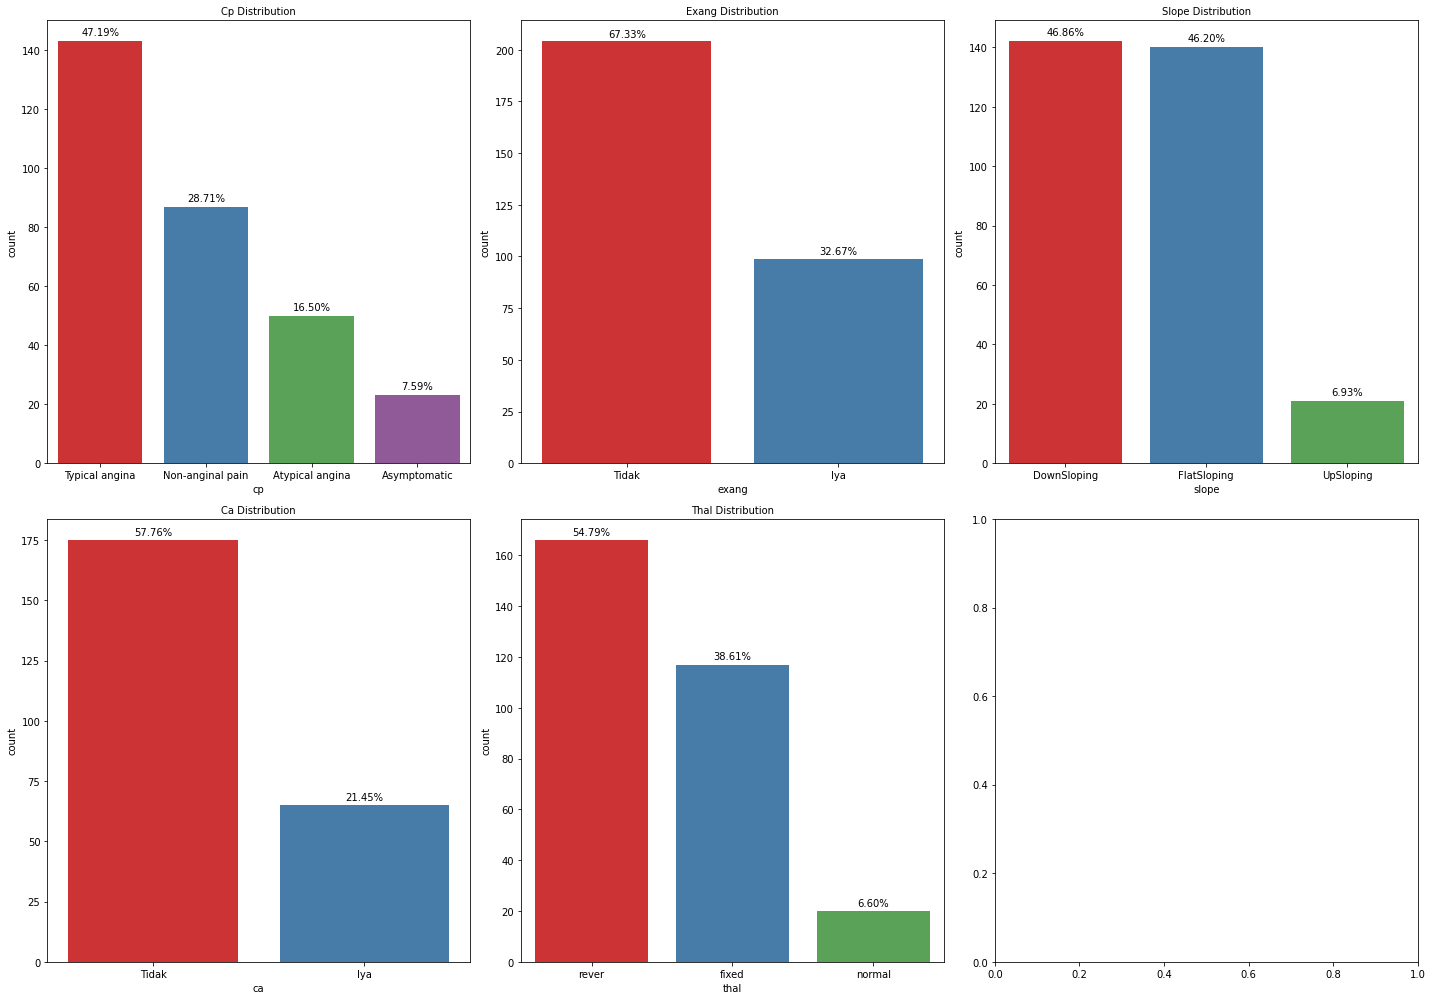

In [ ]:
# menampilkan visualisasi data kategorikal

ctg_dist(df_edit, categorical)

## Histogram

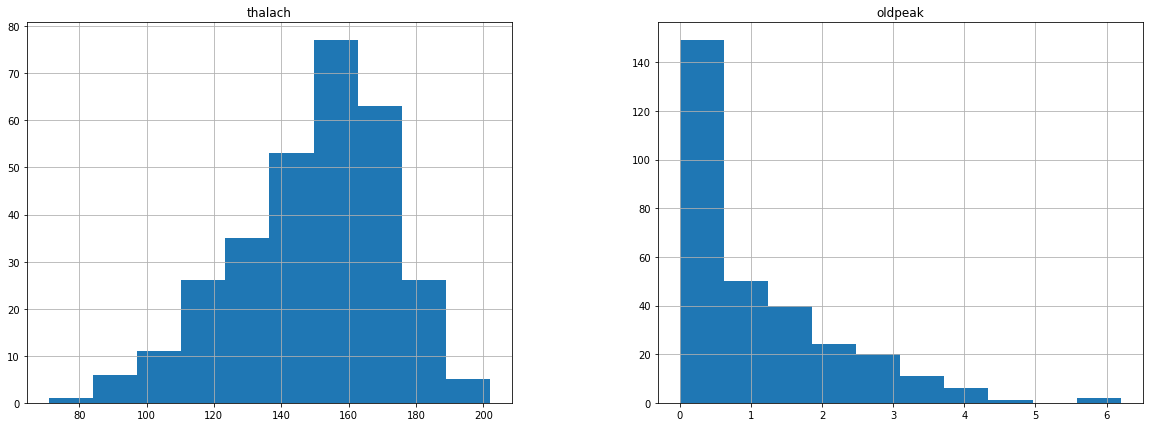

In [ ]:
# menampilkan Visualisasi Data continuous yang sesuai features importance  

df[['thalach','oldpeak']].hist(figsize=(20,7))
plt.show()

##Train Test Split

In [ ]:
# import library
from sklearn.model_selection import train_test_split 

In [ ]:
# split
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.3, random_state=3)

In [ ]:
# Scalling
from sklearn.preprocessing import Normalizer

In [ ]:
# Normalisasi data features 
norm = Normalizer()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_norm, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_norm, columns=x.columns)

In [ ]:
# menampilkan data train normalisasi

x_train_scaled

,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.006172,0.999806,0.000000,0.006789,0.012343,0.000000,0.012343
1,0.000000,0.999153,0.007512,0.030050,0.000000,0.015025,0.022537
2,0.017237,0.999720,0.000000,0.008044,0.005746,0.005746,0.011491
3,0.000000,0.999402,0.008328,0.020821,0.008328,0.000000,0.024985
4,0.013154,0.999740,0.000000,0.000000,0.013154,0.000000,0.013154
...,...,...,...,...,...,...,...
206,0.006577,0.999719,0.000000,0.000000,0.013154,0.013154,0.013154
207,0.000000,0.999628,0.007934,0.007140,0.007934,0.000000,0.023801
208,0.006172,0.999886,0.000000,0.000000,0.006172,0.000000,0.012344
209,0.000000,0.998738,0.008186,0.034383,0.008186,0.024559,0.024559


In [ ]:
# menampilkan data testing normalisasi

x_test_scaled

,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.000000,0.999820,0.000000,0.004917,0.008195,0.000000,0.016390
1,0.013510,0.999712,0.000000,0.005404,0.013510,0.000000,0.013510
2,0.000000,0.999816,0.000000,0.007499,0.012498,0.000000,0.012498
3,0.013420,0.999773,0.000000,0.002013,0.006710,0.006710,0.013420
4,0.011559,0.999850,0.000000,0.000000,0.005779,0.000000,0.011559
...,...,...,...,...,...,...,...
86,0.014079,0.999622,0.000000,0.010559,0.014079,0.007040,0.014079
87,0.000000,0.999261,0.009252,0.013879,0.009252,0.027757,0.018505
88,0.000000,0.999700,0.006894,0.005516,0.006894,0.006894,0.020683
89,0.013599,0.999492,0.000000,0.024477,0.006799,0.000000,0.013599


##Classification Model

###Library

In [ ]:
# import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# evaluation metrics

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')

###KNN

In [ ]:
# modelling KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Evaluation model KNN

y_train_pred = knn.predict(x_train_scaled)
y_test_pred = knn.predict(x_test_scaled)

classification_eval(y_train, y_train_pred, 'KNN Training')
print('\r')

classification_eval(y_test, y_test_pred, 'KNN Testing')

Evaluation Model: KNN Training
[[85 17]
 [10 99]]
Accuracy   : 87.2 %
Precision  : 85.34 %
Recall     : 90.83 %

Evaluation Model: KNN Testing
[[29  7]
 [ 6 49]]
Accuracy   : 85.71 %
Precision  : 87.5 %
Recall     : 89.09 %


###Decision Tree

In [ ]:
# Modelling

dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Evaluation model Decision Tree

y_train_pred = dectree.predict(x_train_scaled)
y_test_pred = dectree.predict(x_test_scaled)

classification_eval(y_train, y_train_pred, 'Decision Tree Training')
print('\r')

classification_eval(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Training
[[ 76  26]
 [  5 104]]
Accuracy   : 85.31 %
Precision  : 80.0 %
Recall     : 95.41 %

Evaluation Model: Decision Tree Testing
[[27  9]
 [ 7 48]]
Accuracy   : 82.42 %
Precision  : 84.21 %
Recall     : 87.27 %


### Random Forest

In [ ]:
# Modelling

ranfor = RandomForestClassifier(max_depth=3)
ranfor.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
# Evaluation model Random Forest

y_train_pred = ranfor.predict(x_train_scaled)
y_test_pred = ranfor.predict(x_test_scaled)

classification_eval(y_train, y_train_pred, 'random forest Training')
print('\r')

classification_eval(y_test, y_test_pred, 'random forest Testing')

Evaluation Model: random forest Training
[[ 81  21]
 [  8 101]]
Accuracy   : 86.26 %
Precision  : 82.79 %
Recall     : 92.66 %

Evaluation Model: random forest Testing
[[28  8]
 [ 3 52]]
Accuracy   : 87.91 %
Precision  : 86.67 %
Recall     : 94.55 %


In [ ]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut


cv = KFold(n_splits=10,
           shuffle=True,
           random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)
dectree = DecisionTreeClassifier(max_depth=3)
ranfor = RandomForestClassifier(max_depth=3)


cv_knn_a = cross_val_score(estimator=knn,
                         X=x,
                         y=y,
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1)

cv_knn_r = cross_val_score(estimator=knn,
                         X=x,
                         y=y,
                         cv=cv,
                         scoring='recall',
                         n_jobs=-1)

cv_knn_p = cross_val_score(estimator=knn,
                         X=x,
                         y=y,
                         cv=cv,
                         scoring='precision',
                         n_jobs=-1)
#===============================================================================
cv_dectree_a = cross_val_score(estimator=dectree,
                         X=x,
                         y=y,
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1)

cv_dectree_r = cross_val_score(estimator=dectree,
                         X=x,
                         y=y,
                         cv=cv,
                         scoring='recall',
                         n_jobs=-1)

cv_dectree_p = cross_val_score(estimator=dectree,
                         X=x,
                         y=y,
                         cv=cv,
                         scoring='precision',
                         n_jobs=-1)
#===============================================================================
cv_ranfor_a = cross_val_score(estimator=ranfor,
                         X=x,
                         y=y,
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1)

cv_ranfor_r = cross_val_score(estimator=ranfor,
                         X=x,
                         y=y,
                         cv=cv,
                         scoring='recall',
                         n_jobs=-1)

cv_ranfor_p = cross_val_score(estimator=ranfor,
                         X=x,
                         y=y,
                         cv=cv,
                         scoring='precision',
                         n_jobs=-1)

In [ ]:
# Menampilkan Cross Validation Mean 

mean = pd.DataFrame(data={'KNN':[cv_knn_a.mean(), cv_knn_r.mean(), cv_knn_p.mean()],
                        'Decision_Tree':[cv_dectree_a.mean(), cv_dectree_r.mean(), cv_dectree_p.mean()],
                        'Random_Forest':[cv_ranfor_a.mean(), cv_ranfor_r.mean(), cv_ranfor_p.mean()]},
                  index=['Accuracy', 'Recall', 'Precision'])
mean

In [ ]:
# Menampilkan Cross Validation Standart Deviation

std = pd.DataFrame(data={'KNN':[cv_knn_a.std(), cv_knn_r.std(), cv_knn_p.std()],
                        'Decision_Tree':[cv_dectree_a.std(), cv_dectree_r.std(), cv_dectree_p.std()],
                        'Random_Forest':[cv_ranfor_a.std(), cv_ranfor_r.std(), cv_ranfor_p.std()]},
                  index=['Accuracy', 'Recall', 'Precision'])
std

,KNN,Decision_Tree,Random_Forest
Accuracy,0.064694,0.063768,0.061766
Recall,0.091752,0.063044,0.059847
Precision,0.096223,0.105251,0.087935


## `Model Recomendation` :

Kita merekomendasikan pengaplikasian model Random Forest, karena nilai Accuracy dan nilai Recall memiliki nilai yang tinggi yang mana evaluasi metric yang kita fokuskan adalah nilai Accuracy dan Recall

## `Kesimmpulan` : 

Jadi pihak kesehatan harus memahami bahwa yang menjadi indikator penting terkait terjadinya penyakit jantung adalah 7 paramater yaitu 
- cp (tipe nyeri dada yang diderita pasien)
- thalach (rata-rata detak jantung pasien) 
- exang (nyeri dada akibat berolah raga)
- oldpeak (penurunan segmen ST akibat olahraga) 
- slope (puncak segmen ST setelah berolahraga)
- ca (jumlah pembuluh darah)
- thal (detak jantung pasien)
